# Anomaly detection 

### workflow:
- lable anomalies with probability distribution or using clustering
- split dataset to the train/test dataset
- train classifier using labled dataset
- assess classifier using metrics for unbalanced samples (e.g. F1, AUC-ROC)


**DBSCAN for anomaly detection: https://pieriantraining.com/dbscan-for-outlier-detection-in-python-and-scikit-learn-machine-learning-in-python/**

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import minmax_scale
from numpy import random, where

In [30]:
random.seed(7)
x, _ = make_blobs(n_samples=1000, centers=1, cluster_std=4, random_state=123)
x = minmax_scale(x)
print(x[:10, :])

[[0.93383948 0.52570506]
 [0.40941254 0.29060382]
 [0.51736021 0.45644457]
 [0.52681583 0.44293264]
 [0.40219869 0.19780916]
 [0.66209546 0.36947795]
 [0.691851   0.46312527]
 [0.38759391 0.39383539]
 [0.75099637 0.49482782]
 [0.4950806  0.44734892]]


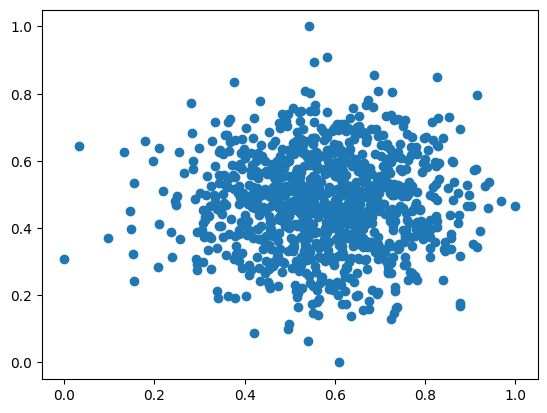

In [31]:
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [32]:
# Main DBSCAN parameters:

# eps: float, default=0.5
# The maximum distance between two samples for one to be considered
# as in the neighborhood of the other. This is not a maximum bound
# on the distances of points within a cluster. It adjusts the size of
# the neighborhood around each data point

# min_samples: int, default=5
# The number of samples (or total weight) in a neighborhood for a point
# to be considered as a core point. This includes the point itself. If min_samples
# is set to a higher value, DBSCAN will find denser clusters, whereas if it is set
# to a lower value, the found clusters will be more sparse.

dbscan = DBSCAN(
    eps=0.08,
    min_samples=5
)
dbscan.fit(x)

DBSCAN(eps=0.08)

In [27]:
# Lables of the clusters after algorythm fits.

# Get the labels of the data points
labels = dbscan.labels_

print(f"Unique cluster lables {set(labels)}")
# Noisy samples are given the label -1

Unique cluster lables {0, -1}


Number of outliers: 10


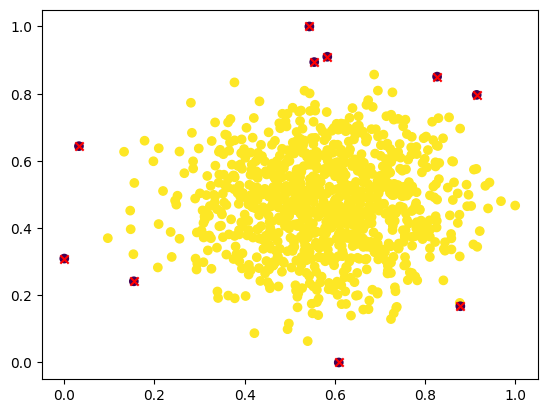

In [33]:
# Identify the outliers
outliers = where(labels == -1)[0]

# Print the number of outliers
print("Number of outliers:", len(outliers))

# Plot the data with the outliers highlighted
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.scatter(x[outliers, 0], x[outliers, 1], c="red", marker="x")
plt.show()